<a href="https://colab.research.google.com/github/DiptaDhar2020/Heart-Sound-Classifier-Thesis/blob/main/heart_sound_classification_sup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
data_path="C:\\Users\\user\\Desktop\\Machine Learning\\Heart Sound Classification\\set_a"
set_a=pd.read_csv("set_a.csv")

In [ ]:
set_a.head()

,fname,label
0,artifact__201012172012.wav,artifact
1,artifact__201105040918.wav,artifact
2,artifact__201105041959.wav,artifact
3,artifact__201105051017.wav,artifact
4,artifact__201105060108.wav,artifact


In [ ]:
from tqdm import tqdm
def pad_wav_file(data_path, desired_length=5):
  # Load the audio data
    for index_num,row in tqdm(set_a.iterrows()):
        file_name = os.path.join(os.path.abspath(data_path), str(row["fname"]))
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

  # Calculate the number of samples needed for the desired length
    desired_samples = int(sample_rate * desired_length)

  # Pad the data with silence
    if len(audio) < desired_samples:
        padding = np.zeros((desired_samples - len(audio), ))
        audio = np.concatenate((audio, padding))

  # Save the padded data to a new WAV file
    librosa.output.write_wav(f"{data_path}_padded.wav", audio, sample_rate)

# Set the directory containing your WAV files
wav_dir = "C:\\Users\\user\\Desktop\\Machine Learning\\Heart Sound Classification"

# Pad all WAV files in the directory
for filename in os.listdir(wav_dir):
    if filename.endswith(".wav"):
        full_path = os.path.join(wav_dir, filename)
        pad_wav_file(full_path)

print("All WAV files have been padded to 5 seconds.")

0it [00:00, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_10428\3080665856.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\Machine Learning\\Heart Sound Classification\\my_heartbeat.wav\\artifact__201012172012.wav'

In [ ]:
def features_extractor(file):
    audio, fs = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=fs, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(set_a.iterrows()):
    file_name = os.path.join(os.path.abspath(data_path), str(row["fname"]))
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

585it [01:09,  8.43it/s]


In [ ]:
#for padding
from tqdm import tqdm
for index_num,row in tqdm(set_a.iterrows()):
    file_name = os.path.join(os.path.abspath(data_path), str(row["fname"]))
    final_class_labels=row["label"]

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()

,feature,label
0,"[-594.4451, 39.270527, 4.9519215, 6.193456, 2....",artifact
1,"[-755.9029, 36.831474, -11.583059, 4.488951, -...",artifact
2,"[-567.8288, 47.297626, -24.984045, 7.8763213, ...",artifact
3,"[-299.02612, 111.469696, -20.94014, 27.45851, ...",artifact
4,"[-295.5859, 101.416336, -17.657728, 14.551581,...",artifact


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())

In [ ]:
X.shape

(585, 40)

In [ ]:
y.shape

(585,)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2022)

In [ ]:
from sklearn.linear_model import LogisticRegression
logi_reg=LogisticRegression()
logi_reg.fit(X_train, y_train)
ypred_logi=logi_reg.predict(X_test)
acc_logi=accuracy_score(y_test,ypred_logi)
print(acc_logi*100)

73.50427350427351


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    artifact       1.00      0.90      0.95        10
     extrahs       0.50      0.40      0.44         5
extrasystole       0.00      0.00      0.00         7
      murmur       0.80      0.41      0.55        29
      normal       0.71      0.95      0.81        66

    accuracy                           0.74       117
   macro avg       0.60      0.53      0.55       117
weighted avg       0.70      0.74      0.69       117



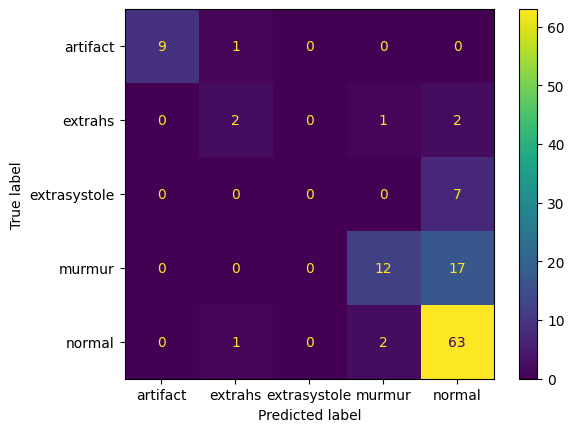

In [ ]:
print(classification_report(y_test,ypred_logi))
confusion_matrix = metrics.confusion_matrix(y_test,ypred_logi)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['artifact', 'extrahs', 'extrasystole', 'murmur', 'normal'])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mod_RF=RandomForestClassifier()
mod_RF.fit(X_train,y_train)
pred_RF=mod_RF.predict(X_test)
acc_RF=accuracy_score(y_test,pred_RF)
print(acc_RF*100)

76.06837606837607


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        10
     extrahs       0.67      0.40      0.50         5
extrasystole       0.00      0.00      0.00         7
      murmur       0.78      0.48      0.60        29
      normal       0.73      0.95      0.83        66

    accuracy                           0.76       117
   macro avg       0.64      0.57      0.58       117
weighted avg       0.72      0.76      0.72       117



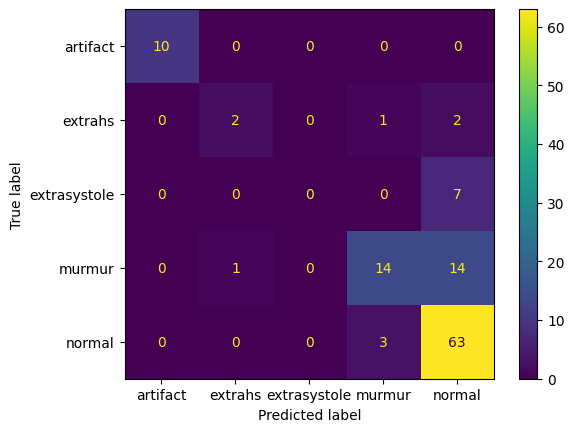

In [ ]:
print(classification_report(y_test,pred_RF))
confusion_matrix = metrics.confusion_matrix(y_test,pred_RF)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['artifact', 'extrahs', 'extrasystole', 'murmur', 'normal'])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
mod_ada=AdaBoostClassifier(n_estimators=90, learning_rate=0.5, algorithm='SAMME.R')
mod_ada.fit(X_test,y_test)
mod_ada.score(X_test, y_test)
pred_ada=mod_ada.predict(X_test)
acc_ada=accuracy_score(y_test, pred_ada)
print(acc_ada*100)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


71.7948717948718


              precision    recall  f1-score   support

    artifact       1.00      0.90      0.95        10
     extrahs       0.83      1.00      0.91         5
extrasystole       1.00      0.14      0.25         7
      murmur       0.67      0.21      0.32        29
      normal       0.68      0.95      0.80        66

    accuracy                           0.72       117
   macro avg       0.84      0.64      0.64       117
weighted avg       0.73      0.72      0.66       117



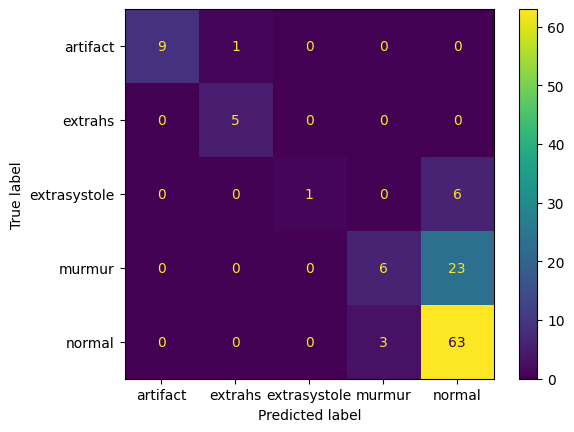

In [ ]:
print(classification_report(y_test, pred_ada))
confusion_matrix = metrics.confusion_matrix(y_test, pred_ada)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['artifact', 'extrahs', 'extrasystole', 'murmur', 'normal'])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
mod_svc=SVC(kernel='linear', probability=True, C=1.0, cache_size=500)
mod_svc.fit(X_train, y_train)
pred_svc=mod_svc.predict(X_test)
acc_svc=accuracy_score(y_test, pred_svc)
print(acc_svc*100)

73.50427350427351


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    artifact       0.89      0.80      0.84        10
     extrahs       1.00      0.20      0.33         5
extrasystole       0.00      0.00      0.00         7
      murmur       0.78      0.48      0.60        29
      normal       0.71      0.95      0.81        66

    accuracy                           0.74       117
   macro avg       0.67      0.49      0.52       117
weighted avg       0.71      0.74      0.69       117



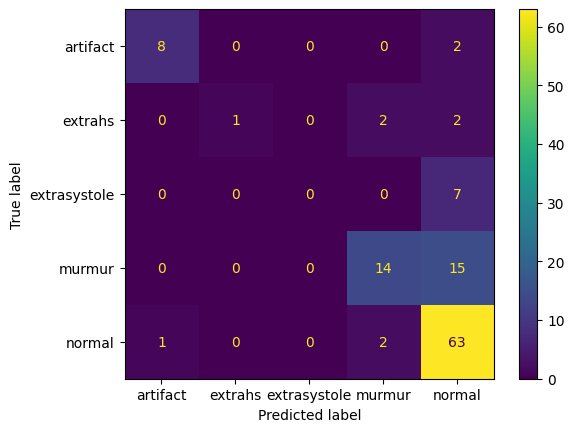

In [ ]:
print(classification_report(y_test, pred_svc))
confusion_matrix = metrics.confusion_matrix(y_test, pred_svc)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['artifact', 'extrahs', 'extrasystole', 'murmur', 'normal'])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
mod_tree = DecisionTreeClassifier()
mod_tree.fit(X_train, y_train)
tree_pred = mod_tree.predict(X_test)
acc_tree = accuracy_score(y_test, tree_pred)
acc_tree*100

58.97435897435898

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_test_pred = mlp.predict(X_test)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred)
print('- Accuracy: %s', mlp_test_accuracy*100)

- Accuracy: %s 69.23076923076923


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimator_list = [
    ('svm',mod_svc),
    ('rf',mod_RF),
    ("ada",mod_ada)
]
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())
# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
#stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
#stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
#stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
#stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
#print('- MCC: %s' % stack_model_train_mcc)
#print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
#print('- MCC: %s' % stack_model_test_mcc)
#print('- F1 score: %s' % stack_model_test_f1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\an

Model performance for Training set
- Accuracy: 0.9166666666666666
----------------------------------
Model performance for Test set
- Accuracy: 0.7350427350427351


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1486: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    artifact       1.00      0.80      0.89        10
     extrahs       0.00      0.00      0.00         5
extrasystole       0.00      0.00      0.00         7
      murmur       0.87      0.45      0.59        29
      normal       0.69      0.98      0.81        66

    accuracy                           0.74       117
   macro avg       0.51      0.45      0.46       117
weighted avg       0.69      0.74      0.68       117



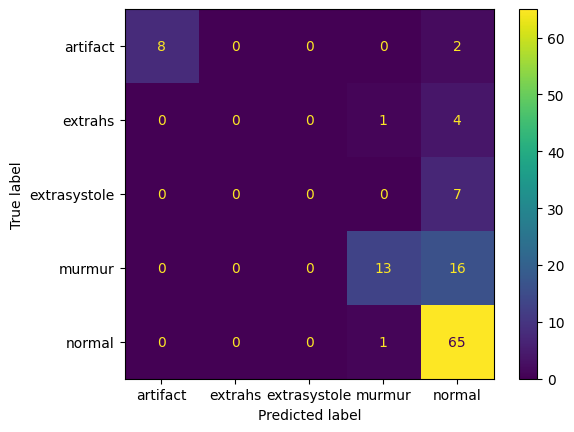

In [ ]:
print(classification_report(y_test, y_test_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=['artifact', 'extrahs', 'extrasystole', 'murmur', 'normal'])

cm_display.plot()
plt.show()

In [ ]:
ACC=pd.DataFrame({'Algorithm':['Logistic Regression', 'Random Forest','Adaboost','SVM', 'Decision Tree Classifier', 'KNN', 'ANN'],'Accuracy':[acc_logi*100,acc_RF*100,acc_ada*100,acc_svc*100, acc_tree*100, acc_knn*100, acc_ann*100]},columns=['Algorithm','Accuracy'])
ACC

,Algorithm,Accuracy
0,Logistic Regression,73.504274
1,Random Forest,76.068376
2,Adaboost,66.666667
3,SVM,74.358974
4,Decision Tree Classifier,58.119658
5,KNN,66.666667
6,ANN,75.213677


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
### Label Encoder
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
# One hot encoding
y=np.array(pd.get_dummies(y))

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2022)

In [ ]:
y_train = np.argmax(y_train, axis=1)

In [ ]:
 tf. __version__

'2.14.0'

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Activation,Flatten,LSTM,Bidirectional
from keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True),
    LSTM(64, activation='tanh', dropout=0.5),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
num_epochs = 150
num_batch_size = 32
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.8054 - loss: 0.4574 - val_accuracy: 0.7265 - val_loss: 0.9122
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7810 - loss: 0.4932 - val_accuracy: 0.7265 - val_loss: 1.0633
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.8029 - loss: 0.4989 - val_accuracy: 0.7179 - val_loss: 0.9791
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.7860 - loss: 0.5201 - val_accuracy: 0.7350 - val_loss: 0.8513
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.8047 - loss: 0.4833 - val_accuracy: 0.7179 - val_loss: 0.9921
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.8053 - loss: 0.4677 - val_accuracy: 0.7265 - val_loss: 0.9276
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7913 - loss: 0.5414 - val_accuracy: 0.7436 - val_loss: 0.9339
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8051 - loss: 0.4706 - val_accu

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.8182 - loss: 0.4260 - val_accuracy: 0.7436 - val_loss: 1.0774
Epoch 52/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.8418 - loss: 0.3517 - val_accuracy: 0.7265 - val_loss: 1.1889
Epoch 53/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8489 - loss: 0.3093 - val_accuracy: 0.7350 - val_loss: 1.2885
Epoch 54/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.8619 - loss: 0.3095 - val_accuracy: 0.6410 - val_loss: 1.3647
Epoch 55/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8562 - loss: 0.3198 - val_accuracy: 0.7179 - val_loss: 1.2642
Epoch 56/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.8724 - loss: 0.3017 - val_accuracy: 0.6923 - val_loss: 1.2056
Epoch 57/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.8486 - loss: 0.3483 - val_accuracy: 0.7265 - val_loss: 1.1406
Epoch 58/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.8164 - loss: 0.3661 - val_accuracy:

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9436 - loss: 0.1855 - val_accuracy: 0.7009 - val_loss: 1.7003
Epoch 102/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.9244 - loss: 0.1922 - val_accuracy: 0.6752 - val_loss: 1.9075
Epoch 103/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9444 - loss: 0.1672 - val_accuracy: 0.6923 - val_loss: 1.9651
Epoch 104/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9450 - loss: 0.1891 - val_accuracy: 0.6581 - val_loss: 1.7027
Epoch 105/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.9311 - loss: 0.2558 - val_accuracy: 0.6838 - val_loss: 1.7653
Epoch 106/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9580 - loss: 0.1528 - val_accuracy: 0.6154 - val_loss: 1.8769
Epoch 107/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9455 - loss: 0.1581 - val_accuracy: 0.6752 - val_loss: 1.8853
Epoch 108/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.9444 - loss: 0.1691 - val_ac

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - accuracy: 0.9726 - loss: 0.1350 - val_accuracy: 0.7009 - val_loss: 1.6844


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
acc_lstm = test_accuracy[1]
acc_lstm

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6762 - loss: 1.6288


0.7008547186851501

In [ ]:
model = Sequential([
    Bidirectional(LSTM(128, activation='tanh', return_sequences=True)),
    Bidirectional(LSTM(64, activation='tanh', dropout=0.5)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
num_epochs = 150
num_batch_size = 32
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.4266 - loss: 1.3764 - val_accuracy: 0.5812 - val_loss: 0.9970
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.5267 - loss: 1.1065 - val_accuracy: 0.6496 - val_loss: 0.9551
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.6343 - loss: 0.9740 - val_accuracy: 0.6496 - val_loss: 0.8624
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.6533 - loss: 0.9658 - val_accuracy: 0.6752 - val_loss: 0.8557
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.6481 - loss: 0.9760 - val_accuracy: 0.6752 - val_loss: 0.8143
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.6539 - loss: 0.9398 - val_accuracy: 0.6410 - val_loss: 0.8458
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.6729 - loss: 0.9373 - val_accuracy: 0.6496 - val_loss: 0.8416
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6510 - loss: 0.9350 - val_acc

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.7417 - loss: 0.7407 - val_accuracy: 0.7009 - val_loss: 0.7377
Epoch 52/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.7089 - loss: 0.7695 - val_accuracy: 0.6923 - val_loss: 0.7294
Epoch 53/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.7283 - loss: 0.7501 - val_accuracy: 0.7094 - val_loss: 0.7186
Epoch 54/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.7485 - loss: 0.6834 - val_accuracy: 0.7179 - val_loss: 0.7049
Epoch 55/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.7331 - loss: 0.7199 - val_accuracy: 0.7265 - val_loss: 0.7199
Epoch 56/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6876 - loss: 0.7790 - val_accuracy: 0.7009 - val_loss: 0.7058
Epoch 57/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.7565 - loss: 0.7062 - val_accuracy: 0.7350 - val_loss: 0.7018
Epoch 58/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.6658 - loss: 0.7769 - val_accuracy:

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7367 - loss: 0.6763 - val_accuracy: 0.7265 - val_loss: 0.7147
Epoch 102/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7638 - loss: 0.6277 - val_accuracy: 0.7436 - val_loss: 0.6916
Epoch 103/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7515 - loss: 0.6271 - val_accuracy: 0.7265 - val_loss: 0.7111
Epoch 104/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7842 - loss: 0.5475 - val_accuracy: 0.7350 - val_loss: 0.7154
Epoch 105/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.7617 - loss: 0.5982 - val_accuracy: 0.7265 - val_loss: 0.7002
Epoch 106/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.7941 - loss: 0.5954 - val_accuracy: 0.7094 - val_loss: 0.8061
Epoch 107/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.7473 - loss: 0.6440 - val_accuracy: 0.7265 - val_loss: 0.7726
Epoch 108/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7584 - loss: 0.5976 - val_ac

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - accuracy: 0.8055 - loss: 0.4448 - val_accuracy: 0.7350 - val_loss: 0.9213


In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
acc_bilstm = test_accuracy[1]
acc_bilstm

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7471 - loss: 0.7920


0.7350427508354187

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
model = Sequential([Conv1D(128, 3, activation='relu',MaxPooling1D(2),Conv1D(64, 3, activation='relu'),MaxPooling1D(2),Flatten(),Dense(32, activation='relu'),Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

SyntaxError: positional argument follows keyword argument (3772781728.py, line 2)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
num_epochs = 200
num_batch_size = 32
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 5)

In [ ]:
#model=Sequential()
#model.add(LSTM(128, activation='relu', return_sequences=True))
#model.add(LSTM(128, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(5, activation='softmax'))
model = Sequential([LSTM(128, activation='relu', return_sequences=True),LSTM(128), Dense(5, activation='softmax')])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
num_epochs = 200
num_batch_size = 32
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\user\anaconda3\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\user\anaconda3\lib\runpy.py", line 86, in _run_code

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\user\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\user\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever

  File "C:\Users\user\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once

  File "C:\Users\user\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\user\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes

  File "C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code

  File "C:\Users\user\AppData\Local\Temp\ipykernel_14420\1142117630.py", line 4, in <module>

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\user\anaconda3\lib\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,5] and labels shape [160]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_24092]

In [ ]:
predicted = model.predict(X_test)
import numpy as np
np.argmax(predicted[0])

4/4 [==============================] - 3s 30ms/step


1

In [ ]:
y_test[0]

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=1)
acc_rnn = test_accuracy[1]
acc_rnn

4/4 [==============================] - 0s 33ms/step - loss: 0.6758 - accuracy: 0.7265


0.7264957427978516

In [ ]:
### No of classes
num_labels=y.shape[1]
num_labels

5

In [ ]:
#normalization
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_20 (Dense)                   │ (None, 100)                   │       4,100 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_4 (Activation)          │ (None, 100)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_9 (Dropout)                │ (None, 100)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_21 (Dense)                   │ (None, 200)                   │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_5 (Activation)          │ (None, 200)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_10 (Dropout)               │ (None, 200)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_22 (Dense)                   │ (None, 100)                   │      20,100 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_6 (Activation)          │ (None, 100)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_11 (Dropout)               │ (None, 100)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_23 (Dense)                   │ (None, 5)                     │         505 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ activation_7 (Activation)          │ (None, 5)                     │           0 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 44,905 (175.41 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
hyperparameters = {
    'optimizer': ['adam', 'rmsprop'],
    'loss': ['binary_crossentropy', 'categorical_crossentropy'],
    'epochs': [10, 20, 30],
    'batch_size': [32, 64, 128],
}

# Create a randomized search object
random_search = RandomizedSearchCV(model, hyperparameters, scoring='accuracy')

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters
print(random_search.best_params_)

# Evaluate the model on the testing data
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x000001A455DC87F0>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
#DL Model Training
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/mul_classification.keras',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 9/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4323 - loss: 48.4593
Epoch 1: val_loss improved from inf to 11.34848, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4350 - loss: 46.5629 - val_accuracy: 0.5812 - val_loss: 11.3485
Epoch 2/200
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4070 - loss: 28.0918 
Epoch 2: val_loss improved from 11.34848 to 6.07246, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4039 - loss: 27.4466 - val_accuracy: 0.5641 - val_loss: 6.0725
Epoch 3/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4261 - loss: 20.1617 
Epoch 3: val_loss improved from 6.07246 to 3.05772, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4246 - loss: 20.0458 - val_accuracy: 0.5299 - val_loss: 3.0577
Epoch 4/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4015 - 

Epoch 26/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5341 - loss: 1.4258 
Epoch 26: val_loss did not improve from 1.18038
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5357 - loss: 1.4414 - val_accuracy: 0.5641 - val_loss: 1.3590
Epoch 27/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 1.3030 
Epoch 27: val_loss did not improve from 1.18038
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5560 - loss: 1.3340 - val_accuracy: 0.5641 - val_loss: 1.3589
Epoch 28/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5439 - loss: 1.6636 
Epoch 28: val_loss did not improve from 1.18038
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5478 - loss: 1.6366 - val_accuracy: 0.5641 - val_loss: 1.3321
Epoch 29/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6145 - loss: 1.4426 
Epoch 29: val_loss did not improve from 1.18038
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6123 - loss: 1.4420 - val_accuracy: 0.5641 - val_loss: 1.2830


Epoch 51/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6197 - loss: 1.1249 
Epoch 51: val_loss improved from 1.07142 to 1.05544, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6161 - loss: 1.1223 - val_accuracy: 0.5641 - val_loss: 1.0554
Epoch 52/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 0.9596
Epoch 52: val_loss improved from 1.05544 to 1.04755, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6548 - loss: 1.0405 - val_accuracy: 0.5641 - val_loss: 1.0475
Epoch 53/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 1.2452 
Epoch 53: val_loss improved from 1.04755 to 1.03525, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5908 - loss: 1.2310 - val_accuracy: 0.5641 - val_loss: 1.0352
Epoch 54/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6290 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6369 - loss: 1.0265 - val_accuracy: 0.6068 - val_loss: 0.9538
Epoch 75/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6377 - loss: 1.0830
Epoch 75: val_loss improved from 0.95380 to 0.94991, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6365 - loss: 1.0787 - val_accuracy: 0.5812 - val_loss: 0.9499
Epoch 76/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6431 - loss: 0.9609 
Epoch 76: val_loss improved from 0.94991 to 0.94605, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6423 - loss: 0.9645 - val_accuracy: 0.6068 - val_loss: 0.9460
Epoch 77/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - loss: 1.0768 
Epoch 77: val_loss improved from 0.94605 to 0.93251, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6162 - loss: 1.075

12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6298 - loss: 0.9491 
Epoch 99: val_loss did not improve from 0.92067
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6337 - loss: 0.9449 - val_accuracy: 0.5983 - val_loss: 0.9381
Epoch 100/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6955 - loss: 0.8825 
Epoch 100: val_loss did not improve from 0.92067
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6855 - loss: 0.8964 - val_accuracy: 0.6154 - val_loss: 0.9214
Epoch 101/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6562 - loss: 0.9095
Epoch 101: val_loss did not improve from 0.92067
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6416 - loss: 0.9570 - val_accuracy: 0.6154 - val_loss: 0.9395
Epoch 102/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 1.1254
Epoch 102: val_loss did not improve from 0.92067
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 0.9336 - val_accuracy: 0.6239 - val_loss: 0.9340
Epoch 1

14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.9626 
Epoch 123: val_loss did not improve from 0.88889
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6326 - loss: 0.9620 - val_accuracy: 0.6325 - val_loss: 0.9026
Epoch 124/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.7315
Epoch 124: val_loss did not improve from 0.88889
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6423 - loss: 0.9026 - val_accuracy: 0.6410 - val_loss: 0.8996
Epoch 125/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6301 - loss: 0.9298 
Epoch 125: val_loss improved from 0.88889 to 0.88588, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6316 - loss: 0.9276 - val_accuracy: 0.6410 - val_loss: 0.8859
Epoch 126/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8125 - loss: 0.7361
Epoch 126: val_loss did not improve from 0.88588
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6820 - lo

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6542 - loss: 0.8987 - val_accuracy: 0.6410 - val_loss: 0.8585
Epoch 148/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6250 - loss: 0.9211
Epoch 148: val_loss did not improve from 0.85851
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6551 - loss: 0.8920 - val_accuracy: 0.6410 - val_loss: 0.8634
Epoch 149/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: 0.9132 
Epoch 149: val_loss improved from 0.85851 to 0.85370, saving model to saved_models/mul_classification.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6360 - loss: 0.9115 - val_accuracy: 0.6410 - val_loss: 0.8537
Epoch 150/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6463 - loss: 0.8884 
Epoch 150: val_loss did not improve from 0.85370
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6464 - loss: 0.8943 - val_accuracy: 0.6410 - val_loss: 0.8580
Epoch 151/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6804 - loss: 0.8163 - val_accuracy: 0.6581 - val_loss: 0.7888
Epoch 172/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6830 - loss: 0.8336 
Epoch 172: val_loss did not improve from 0.78884
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6829 - loss: 0.8352 - val_accuracy: 0.6752 - val_loss: 0.7912
Epoch 173/200
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6838 - loss: 0.8132 
Epoch 173: val_loss did not improve from 0.78884
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6830 - loss: 0.8155 - val_accuracy: 0.7009 - val_loss: 0.7926
Epoch 174/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6493 - loss: 0.8891 
Epoch 174: val_loss did not improve from 0.78884
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6525 - loss: 0.8831 - val_accuracy: 0.6923 - val_loss: 0.7947
Epoch 175/200
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6728 - loss: 0.8968 
Epoch 175: val_loss did not improve from

Epoch 196/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6562 - loss: 0.7496
Epoch 196: val_loss did not improve from 0.72701
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6923 - loss: 0.8428 - val_accuracy: 0.7094 - val_loss: 0.7641
Epoch 197/200
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7188 - loss: 1.5905
Epoch 197: val_loss did not improve from 0.72701
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7075 - loss: 0.9627 - val_accuracy: 0.7009 - val_loss: 0.7541
Epoch 198/200
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.8123 
Epoch 198: val_loss did not improve from 0.72701
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6942 - loss: 0.8133 - val_accuracy: 0.7009 - val_loss: 0.7429
Epoch 199/200
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6884 - loss: 0.8411 
Epoch 199: val_loss did not improve from 0.72701
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6903 - loss: 0.8395 - val_accuracy: 0.7009 - val_loss

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
acc_ann = test_accuracy[1]
acc_ann

0.7435897588729858

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
labelencoder=LabelEncoder()
filename="DiptaBeat.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
model = load_model("saved_models/mul_classification.hdf5")
#print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
ans = predicted_label[0][4]*100
#predicted_label
ans

C:\Users\user\AppData\Local\Temp\ipykernel_13780\3279002212.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')


NoBackendError: 